### Initialize

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from pathlib import Path
import glob
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

### Data Preperation

In [ ]:
path = "/content/gdrive/MyDrive/Datasets/BTP DATA/images/"

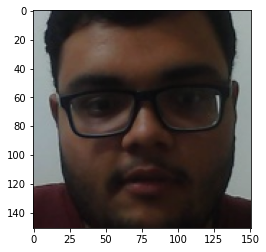

In [ ]:
img = cv2.imread(os.path.join(path,"vivek/1.jpg"), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
images = []                 
labels = []  

classes = ["darsh", "jithu", "nikhil", "pawan", "raunak", "srujan", "vivek"]

In [ ]:
for k in range(len(classes)):
    for i in range(1,502):
        j=str(i)+'.jpg'
        img = cv2.imread(os.path.join(path,classes[k],j), cv2.IMREAD_COLOR)  
        img = cv2.resize(img, (224,224))
        labels.append(k)
        images.append(img)

In [ ]:
len(images), len(labels)

(3514, 3514)

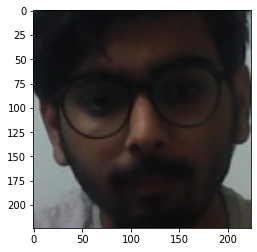

In [ ]:
img = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(images, labels, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Training (using pretrained resnet50 model)

In [ ]:
resnet50 = tf.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (224,224,3))

In [ ]:
model = tf.keras.Sequential([
    resnet50,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),  # 2
    tf.keras.layers.Dropout(0.2),  # 3
    tf.keras.layers.GlobalAveragePooling2D(),  # 4
    tf.keras.layers.Dense(7, activation='softmax')  # 5
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          589856    
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 global_average_pooling2d_2   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 24,177,799
Trainable params: 24,124,679
Non-trainable params: 53,120
_____________________________________

In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["acc"]
)

In [ ]:
from keras import callbacks

hist_1 = model.fit(X_train, y_train, batch_size = 64, 
                    epochs = 50, validation_data =(X_test, y_test))

Epoch 1/50
42/42 [==============================] - 39s 804ms/step - loss: 3.0355 - acc: 0.2425 - val_loss: 437.2291 - val_acc: 0.1604
Epoch 2/50
42/42 [==============================] - 31s 728ms/step - loss: 1.6236 - acc: 0.3374 - val_loss: 1.8837 - val_acc: 0.1388
Epoch 3/50
42/42 [==============================] - 30s 707ms/step - loss: 1.5620 - acc: 0.3913 - val_loss: 3.4452 - val_acc: 0.1593
Epoch 4/50
42/42 [==============================] - 30s 719ms/step - loss: 1.1317 - acc: 0.5935 - val_loss: 1.8294 - val_acc: 0.2469
Epoch 5/50
42/42 [==============================] - 30s 722ms/step - loss: 0.9182 - acc: 0.6687 - val_loss: 3.4147 - val_acc: 0.2582
Epoch 6/50
42/42 [==============================] - 30s 716ms/step - loss: 0.8779 - acc: 0.6588 - val_loss: 1.8773 - val_acc: 0.3697
Epoch 7/50
42/42 [==============================] - 30s 716ms/step - loss: 0.8570 - acc: 0.6417 - val_loss: 3.2313 - val_acc: 0.3129
Epoch 8/50
42/42 [==============================] - 30s 719ms/step 

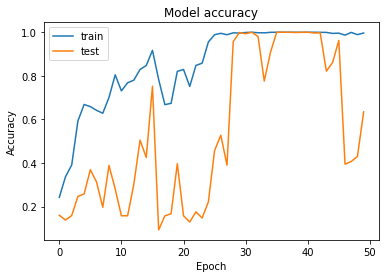

In [ ]:
plt.plot(hist_1.history['acc'])
plt.plot(hist_1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

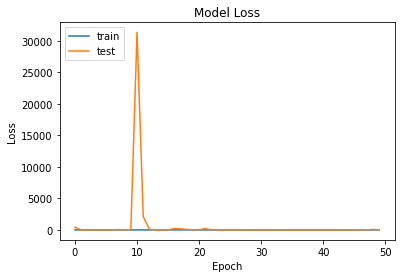

In [ ]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
resnet50 = tf.keras.applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (224,224,3))

In [ ]:
model2 = tf.keras.Sequential([
    resnet50,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),  # 2
    tf.keras.layers.Dropout(0.2),  # 3
    tf.keras.layers.GlobalAveragePooling2D(),  # 4
    tf.keras.layers.Dense(7, activation='softmax')  # 5
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 32)          589856    
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 global_average_pooling2d_3   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 24,177,799
Trainable params: 24,124,679
Non-trainable params: 53,120
_____________________________________

In [ ]:
model2.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["acc"]
)

In [ ]:
from keras import callbacks

hist_1 = model2.fit(X_train, y_train, batch_size = 64, 
                    epochs = 40, validation_data =(X_test, y_test))

Epoch 1/40
42/42 [==============================] - 34s 675ms/step - loss: 2.4933 - acc: 0.2793 - val_loss: 5107.6660 - val_acc: 0.1547
Epoch 2/40
42/42 [==============================] - 28s 658ms/step - loss: 1.4852 - acc: 0.4148 - val_loss: 8.9737 - val_acc: 0.2651
Epoch 3/40
42/42 [==============================] - 28s 667ms/step - loss: 1.0224 - acc: 0.6080 - val_loss: 1.9495 - val_acc: 0.1468
Epoch 4/40
42/42 [==============================] - 28s 675ms/step - loss: 0.8219 - acc: 0.7609 - val_loss: 2.1341 - val_acc: 0.2947
Epoch 5/40
42/42 [==============================] - 29s 682ms/step - loss: 0.5782 - acc: 0.8501 - val_loss: 33.4785 - val_acc: 0.1433
Epoch 6/40
42/42 [==============================] - 29s 689ms/step - loss: 0.4284 - acc: 0.9328 - val_loss: 13.1658 - val_acc: 0.1934
Epoch 7/40
42/42 [==============================] - 29s 696ms/step - loss: 0.3268 - acc: 0.9617 - val_loss: 2.6072 - val_acc: 0.3868
Epoch 8/40
42/42 [==============================] - 30s 704ms/st

In [ ]:
model2.save(os.path.join(path, "our_model"))

### Testing

In [ ]:
loaded_model = tf.keras.models.load_model(os.path.join(path, "our_model"))

In [ ]:
y_test_pred = loaded_model.predict(X_test)

28/28 [==============================] - 5s 106ms/step


In [ ]:
y_test_pred.shape

(879, 7)

In [ ]:
temp = []
for pred in y_test_pred:
   k = pred.argmax(axis=0)
   temp.append(k)
y_test_pred = temp

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_test_pred, target_names=classes, digits=4))

              precision    recall  f1-score   support

       darsh     1.0000    1.0000    1.0000       139
       jithu     1.0000    1.0000    1.0000       129
      nikhil     1.0000    1.0000    1.0000       126
       pawan     1.0000    1.0000    1.0000       109
      raunak     1.0000    1.0000    1.0000       129
      srujan     1.0000    1.0000    1.0000       111
       vivek     1.0000    1.0000    1.0000       136

    accuracy                         1.0000       879
   macro avg     1.0000    1.0000    1.0000       879
weighted avg     1.0000    1.0000    1.0000       879



In [ ]:
print(accuracy_score(y_test, y_test_pred))

1.0


### Converting into tflite model and quantizing

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(os.path.join(path, "our_model"))
tflite_model = converter.convert()

In [ ]:
len(tflite_model)

96339788

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(os.path.join(path, "our_model"))
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

In [ ]:
len(tflite_quantized_model)

24525808

In [ ]:
with open(os.path.join(path, "tflite_facial_recognition"), 'wb') as f:
  f.write(tflite_quantized_model)
